In [1]:
import os
os.getcwd()  # Get Working Directory

'C:\\Users\\Jan\\DroneCourse\\JanGIT\\final_4'

In [2]:
%%time
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras

Using TensorFlow backend.


Wall time: 4.01 s


In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [4]:
# dimensions of our images.
img_width, img_height = 150, 150

In [5]:

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 413
nb_validation_samples = 100
epochs = 100
batch_size = 30

In [6]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255)

In [8]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [9]:
training = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
x,y = training.next()

Found 826 images belonging to 2 classes.


In [10]:
y

array([0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1.], dtype=float32)

In [11]:
validation = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

x,y = validation.next()

Found 200 images belonging to 2 classes.


In [12]:
y

array([1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 0.], dtype=float32)

In [22]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [23]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [24]:
history = model.fit_generator(
    training,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/100
6/6 [==============================] - 6s 1s/step - loss: 0.7348 - accuracy: 0.5000 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 2/100
6/6 [==============================] - 5s 873ms/step - loss: 0.6909 - accuracy: 0.5260 - val_loss: 0.6894 - val_accuracy: 0.6000
Epoch 3/100
6/6 [==============================] - 6s 1s/step - loss: 0.6832 - accuracy: 0.5861 - val_loss: 0.6835 - val_accuracy: 0.5500
Epoch 4/100
6/6 [==============================] - 5s 906ms/step - loss: 0.6973 - accuracy: 0.4889 - val_loss: 0.6825 - val_accuracy: 0.5000
Epoch 5/100
6/6 [==============================] - 6s 958ms/step - loss: 0.6854 - accuracy: 0.5318 - val_loss: 0.6816 - val_accuracy: 0.5833
Epoch 6/100
6/6 [==============================] - 6s 951ms/step - loss: 0.6753 - accuracy: 0.5750 - val_loss: 0.6762 - val_accuracy: 0.6333
Epoch 7/100
6/6 [==============================] - 6s 919ms/step - loss: 0.6771 - accuracy: 0.5983 - val_loss: 0.6711 - val_accuracy: 0.5833
Epoch 8/100
6/6 [==

Epoch 59/100
6/6 [==============================] - 5s 901ms/step - loss: 0.5645 - accuracy: 0.7199 - val_loss: 0.5539 - val_accuracy: 0.7167
Epoch 60/100
6/6 [==============================] - 5s 883ms/step - loss: 0.6111 - accuracy: 0.7028 - val_loss: 0.5656 - val_accuracy: 0.8000
Epoch 61/100
6/6 [==============================] - 6s 974ms/step - loss: 0.5261 - accuracy: 0.7556 - val_loss: 0.6107 - val_accuracy: 0.6667
Epoch 62/100
6/6 [==============================] - 5s 896ms/step - loss: 0.5040 - accuracy: 0.7659 - val_loss: 0.5668 - val_accuracy: 0.7833
Epoch 63/100
6/6 [==============================] - 6s 941ms/step - loss: 0.5507 - accuracy: 0.7250 - val_loss: 0.4986 - val_accuracy: 0.8333
Epoch 64/100
6/6 [==============================] - 5s 885ms/step - loss: 0.4959 - accuracy: 0.7688 - val_loss: 0.4131 - val_accuracy: 0.9500
Epoch 65/100
6/6 [==============================] - 6s 921ms/step - loss: 0.5660 - accuracy: 0.7333 - val_loss: 0.5401 - val_accuracy: 0.7667
Epoch 

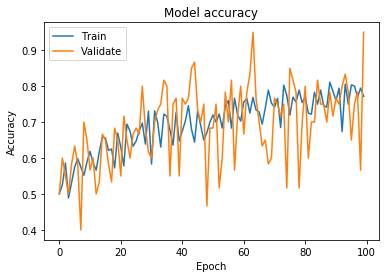

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [27]:
predictions = model.predict(validation)

In [28]:
predictions

array([[0.247080],
       [0.175652],
       [0.198303],
       [0.684816],
       [0.157416],
       [0.148802],
       [0.694116],
       [0.614594],
       [0.233073],
       [0.404776],
       [0.820632],
       [0.259385],
       [0.634772],
       [0.864907],
       [0.064601],
       [0.390807],
       [0.546508],
       [0.656602],
       [0.694071],
       [0.523093],
       [0.743822],
       [0.830499],
       [0.393083],
       [0.481052],
       [0.788214],
       [0.724857],
       [0.207292],
       [0.208911],
       [0.649808],
       [0.375190],
       [0.768167],
       [0.593175],
       [0.172986],
       [0.511432],
       [0.192612],
       [0.148769],
       [0.252578],
       [0.082490],
       [0.700572],
       [0.211166],
       [0.254121],
       [0.668300],
       [0.129609],
       [0.616762],
       [0.311849],
       [0.296063],
       [0.144183],
       [0.152184],
       [0.332827],
       [0.524015],
       [0.412719],
       [0.750253],
       [0.45

In [29]:
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [20]:
newpredictions =  np.rint(predictions)

In [21]:
newpredictions

array([[0.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [0.00